In [1]:
import pandas as pd
import numpy as np
import scGeneRAI
import os
import networkx as nx

In [2]:
#data = pd.read_csv('../GeneNetworkLRP2/data/epi_top2000.csv')

In [3]:
#sel_data = data[['patient_id','cell_type_epi','ID1', 'ID2', 'ID3', 'ID4', 'JUN', 'FOS', 'FOSB', 'HSPA5', 'HSP90B1', 'RPS27', 'RPL10', 'EEF1A1']]

In [4]:
#sel_data = sel_data[(np.isin(sel_data['patient_id'],['p018', 'p019', 'p033', 'p034'])) & (np.isin(sel_data['cell_type_epi'],['Tumor', 'Club', 'AT2']))]

In [5]:
#sel_data.to_csv('../scGeneRAI/example_data/example_data.csv')

In [8]:
ex_data = pd.read_csv('../../scGeneRAI/example_data/example_data.csv').iloc[:,3:]
ex_data_descriptors = pd.read_csv('../../scGeneRAI/example_data/example_data.csv').iloc[:,1:3]

In [9]:
means = ex_data.mean(axis=0)
sds = ex_data.std(axis=0)

ex_data = (ex_data-means)/sds

In [10]:
ex_data_descriptors

,patient_id,cell_type_epi
0,p018,Ciliated
1,p018,Ciliated
2,p018,Tumor
3,p018,AT1
4,p018,Tumor
...,...,...
18109,p034,Tumor
18110,p034,Tumor
18111,p034,Tumor
18112,p034,Tumor


In [11]:
model = scGeneRAI.scGeneRAI()

In [12]:
model.fit(ex_data, nepochs = 100, model_depth =2, descriptors = ex_data_descriptors, early_stopping=True, device_name = 'cpu')


  2%|███▎                                                                                                                                                                   | 2/100 [00:04<03:56,  2.41s/it]


KeyboardInterrupt: 

In [13]:
model.predict_networks(ex_data.iloc[:100,:], descriptors = ex_data_descriptors.iloc[:100,:], PATH = '.')

KeyboardInterrupt: 

In [14]:
ex_data_descriptors.shape

(18114, 2)

In [15]:
files = os.listdir('./results')

In [16]:
network_data = pd.concat([pd.read_csv('./results/' + file) for file in files])

In [17]:
network_data['LRP'] = np.abs(network_data['LRP'])
network_data = network_data[network_data['source_gene'] != network_data['target_gene']]

average_network = network_data[['LRP', 'source_gene', 'target_gene']].groupby(['source_gene', 'target_gene']).mean().reset_index()
average_network

,source_gene,target_gene,LRP
0,FOS,EEF1A1,0.022092
1,FOSB,EEF1A1,0.033447
2,FOSB,FOS,0.053692
3,HSP90B1,EEF1A1,0.017115
4,HSP90B1,FOS,0.017636
...,...,...,...
61,RPS27,ID2,0.026826
62,RPS27,ID3,0.022824
63,RPS27,ID4,0.022233
64,RPS27,JUN,0.027037


In [18]:
edges = average_network.sort_values(by='LRP', ascending=False).iloc[:10,:]
edges

,source_gene,target_gene,LRP
37,JUN,FOS,0.061213
38,JUN,FOSB,0.055724
2,FOSB,FOS,0.053692
17,ID2,FOSB,0.041951
45,RPL10,EEF1A1,0.039098
65,RPS27,RPL10,0.038799
51,RPL10,ID2,0.037703
16,ID2,FOS,0.036951
25,ID3,HSPA5,0.036457
43,JUN,ID3,0.036059


In [19]:
network = nx.from_pandas_edgelist(edges, source='source_gene', target='target_gene', edge_attr='LRP')

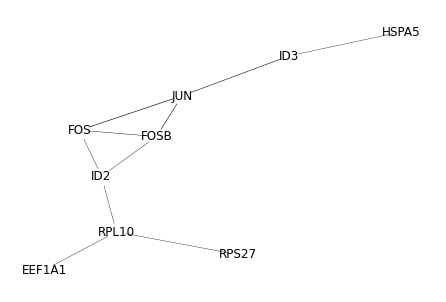

In [20]:
nx.draw(network, with_labels=True, node_color='white', width = edges['LRP']*10)